In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/bbc-news-data.csv', sep='\t', engine='python')
display(df.head())

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [3]:
df.head(10)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ..."
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [5]:
df.describe()

,category,filename,title,content
count,2225,2225,2225,2225
unique,5,511,2096,2092
top,sport,001.txt,Microsoft seeking spyware trojan,Microsoft has warned PC users to update their...
freq,511,5,2,2


In [6]:
# LOWERCASING THE TEXT
df['title'] = df['title'].str.lower()
df['content'] = df['content'].str.lower()

In [7]:
df['filename'].unique()

array(['001.txt', '002.txt', '003.txt', '004.txt', '005.txt', '006.txt',
       '007.txt', '008.txt', '009.txt', '010.txt', '011.txt', '012.txt',
       '013.txt', '014.txt', '015.txt', '016.txt', '017.txt', '018.txt',
       '019.txt', '020.txt', '021.txt', '022.txt', '023.txt', '024.txt',
       '025.txt', '026.txt', '027.txt', '028.txt', '029.txt', '030.txt',
       '031.txt', '032.txt', '033.txt', '034.txt', '035.txt', '036.txt',
       '037.txt', '038.txt', '039.txt', '040.txt', '041.txt', '042.txt',
       '043.txt', '044.txt', '045.txt', '046.txt', '047.txt', '048.txt',
       '049.txt', '050.txt', '051.txt', '052.txt', '053.txt', '054.txt',
       '055.txt', '056.txt', '057.txt', '058.txt', '059.txt', '060.txt',
       '061.txt', '062.txt', '063.txt', '064.txt', '065.txt', '066.txt',
       '067.txt', '068.txt', '069.txt', '070.txt', '071.txt', '072.txt',
       '073.txt', '074.txt', '075.txt', '076.txt', '077.txt', '078.txt',
       '079.txt', '080.txt', '081.txt', '082.txt', 

In [8]:
df = df.drop('filename',axis = 1)
df.head()

,category,title,content
0,business,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,business,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,business,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,business,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...
4,business,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...


In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
exclude = string.punctuation

# TRANSLATE- IT IS A BUILT IN PYTHON FUNCTION THAT MAPS CHARACTERS(HERE PUNCTUATIONS) INTO NONE.
# eg - str.maketrans('abc,'123',exclude)
#string = abcbca will be translated to 123231.


In [11]:
def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

In [12]:
text  = 'string. with,? puinctuations.'

In [13]:
remove_punc(text)

'string with puinctuations'

In [14]:
df['category'] = df['category'].apply(remove_punc)
df['content'] = df['content'].apply(remove_punc)
df['title'] = df['title'].apply(remove_punc)

In [15]:
df.head()

,category,title,content
0,business,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,business,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,business,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,business,high fuel prices hit bas profits,british airways has blamed high fuel prices f...
4,business,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...


# TOKENIZATION


In [16]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize , sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:
text = df.loc[0,"content"]

In [18]:
tokens = word_tokenize(text)

In [19]:
tokens

['quarterly',
 'profits',
 'at',
 'us',
 'media',
 'giant',
 'timewarner',
 'jumped',
 '76',
 'to',
 '113bn',
 '£600m',
 'for',
 'the',
 'three',
 'months',
 'to',
 'december',
 'from',
 '639m',
 'yearearlier',
 'the',
 'firm',
 'which',
 'is',
 'now',
 'one',
 'of',
 'the',
 'biggest',
 'investors',
 'in',
 'google',
 'benefited',
 'from',
 'sales',
 'of',
 'highspeed',
 'internet',
 'connections',
 'and',
 'higher',
 'advert',
 'sales',
 'timewarner',
 'said',
 'fourth',
 'quarter',
 'sales',
 'rose',
 '2',
 'to',
 '111bn',
 'from',
 '109bn',
 'its',
 'profits',
 'were',
 'buoyed',
 'by',
 'oneoff',
 'gains',
 'which',
 'offset',
 'a',
 'profit',
 'dip',
 'at',
 'warner',
 'bros',
 'and',
 'less',
 'users',
 'for',
 'aol',
 'time',
 'warner',
 'said',
 'on',
 'friday',
 'that',
 'it',
 'now',
 'owns',
 '8',
 'of',
 'searchengine',
 'google',
 'but',
 'its',
 'own',
 'internet',
 'business',
 'aol',
 'had',
 'has',
 'mixed',
 'fortunes',
 'it',
 'lost',
 '464000',
 'subscribers',
 'in

In [20]:
df['text'] = df['title']+" "+df['content']
df.head()

,category,title,content,text
0,business,ad sales boost time warner profit,quarterly profits at us media giant timewarne...,ad sales boost time warner profit quarterly p...
1,business,dollar gains on greenspan speech,the dollar has hit its highest level against ...,dollar gains on greenspan speech the dollar h...
2,business,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...,yukos unit buyer faces loan claim the owners ...
3,business,high fuel prices hit bas profits,british airways has blamed high fuel prices f...,high fuel prices hit bas profits british airw...
4,business,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...,pernod takeover talk lifts domecq shares in u...


In [21]:
df = df.drop(columns = ['title','content'],axis = 1)
df.head()

,category,text
0,business,ad sales boost time warner profit quarterly p...
1,business,dollar gains on greenspan speech the dollar h...
2,business,yukos unit buyer faces loan claim the owners ...
3,business,high fuel prices hit bas profits british airw...
4,business,pernod takeover talk lifts domecq shares in u...


In [22]:
df.head()

,category,text
0,business,ad sales boost time warner profit quarterly p...
1,business,dollar gains on greenspan speech the dollar h...
2,business,yukos unit buyer faces loan claim the owners ...
3,business,high fuel prices hit bas profits british airw...
4,business,pernod takeover talk lifts domecq shares in u...


# TOKENIZATION

In [23]:
df['tokens'] = df['text'].apply(word_tokenize)
df.head()

,category,text,tokens
0,business,ad sales boost time warner profit quarterly p...,"[ad, sales, boost, time, warner, profit, quart..."
1,business,dollar gains on greenspan speech the dollar h...,"[dollar, gains, on, greenspan, speech, the, do..."
2,business,yukos unit buyer faces loan claim the owners ...,"[yukos, unit, buyer, faces, loan, claim, the, ..."
3,business,high fuel prices hit bas profits british airw...,"[high, fuel, prices, hit, bas, profits, britis..."
4,business,pernod takeover talk lifts domecq shares in u...,"[pernod, takeover, talk, lifts, domecq, shares..."


In [24]:
df['tokens'] = df['tokens'].apply(lambda x :[t for t in x if t.isalpha()])

In [25]:
df.head()

,category,text,tokens
0,business,ad sales boost time warner profit quarterly p...,"[ad, sales, boost, time, warner, profit, quart..."
1,business,dollar gains on greenspan speech the dollar h...,"[dollar, gains, on, greenspan, speech, the, do..."
2,business,yukos unit buyer faces loan claim the owners ...,"[yukos, unit, buyer, faces, loan, claim, the, ..."
3,business,high fuel prices hit bas profits british airw...,"[high, fuel, prices, hit, bas, profits, britis..."
4,business,pernod takeover talk lifts domecq shares in u...,"[pernod, takeover, talk, lifts, domecq, shares..."


In [26]:
df.head()

,category,text,tokens
0,business,ad sales boost time warner profit quarterly p...,"[ad, sales, boost, time, warner, profit, quart..."
1,business,dollar gains on greenspan speech the dollar h...,"[dollar, gains, on, greenspan, speech, the, do..."
2,business,yukos unit buyer faces loan claim the owners ...,"[yukos, unit, buyer, faces, loan, claim, the, ..."
3,business,high fuel prices hit bas profits british airw...,"[high, fuel, prices, hit, bas, profits, britis..."
4,business,pernod takeover talk lifts domecq shares in u...,"[pernod, takeover, talk, lifts, domecq, shares..."


In [27]:
df.head()

,category,text,tokens
0,business,ad sales boost time warner profit quarterly p...,"[ad, sales, boost, time, warner, profit, quart..."
1,business,dollar gains on greenspan speech the dollar h...,"[dollar, gains, on, greenspan, speech, the, do..."
2,business,yukos unit buyer faces loan claim the owners ...,"[yukos, unit, buyer, faces, loan, claim, the, ..."
3,business,high fuel prices hit bas profits british airw...,"[high, fuel, prices, hit, bas, profits, britis..."
4,business,pernod takeover talk lifts domecq shares in u...,"[pernod, takeover, talk, lifts, domecq, shares..."


# LEMMATIZATION

In [28]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
df['tokens'] = df['tokens'].apply(lambda x : [lemmatizer.lemmatize(t.lower())for t in tokens])

# STOPWORD REMOVAL

In [30]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
stop_words.update(['u'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df['tokens'] = df['tokens'].apply(lambda y :[t for t in y if t.lower() not in stop_words])

In [32]:
df['clean_text'] = df['tokens'].apply(lambda tokens : " ".join(tokens))

In [33]:
df.drop(columns =['clean_text'],inplace=True)
df.head()

,category,text,tokens
0,business,ad sales boost time warner profit quarterly p...,"[quarterly, profit, medium, giant, timewarner,..."
1,business,dollar gains on greenspan speech the dollar h...,"[quarterly, profit, medium, giant, timewarner,..."
2,business,yukos unit buyer faces loan claim the owners ...,"[quarterly, profit, medium, giant, timewarner,..."
3,business,high fuel prices hit bas profits british airw...,"[quarterly, profit, medium, giant, timewarner,..."
4,business,pernod takeover talk lifts domecq shares in u...,"[quarterly, profit, medium, giant, timewarner,..."


# FEATURE EXTRACTION AND MODELLING DATA

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
le = LabelEncoder()
y = df['category']
y = le.fit_transform(y)
tfidf = TfidfVectorizer(max_features = 5000,ngram_range=(1,2),stop_words='english')
X = tfidf.fit_transform(df['text'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state =42)
xgb = XGBClassifier(
    objective = 'multi:softmax',
    num_class = len(le.classes_),
    eval_metric = 'mlogloss',
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 6,
    subsample = 0.8,
    colsample_bytree = 0.8,
    use_label_encoder = False,
    random_state = 42
)

xgb.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:22:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=5, ...)

# EVALUATING MODEL PERFORMANCE

In [55]:
from sklearn.metrics import accuracy_score,classification_report
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred,target_names=le.classes_))

Accuracy: 0.9595505617977528
Classification Report                precision    recall  f1-score   support

     business       0.96      0.95      0.95       115
entertainment       0.99      0.94      0.96        72
     politics       0.95      0.95      0.95        76
        sport       0.98      1.00      0.99       102
         tech       0.93      0.95      0.94        80

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



In [46]:
df['category'].value_counts(normalize=True)

,proportion
category,
sport,0.229663
business,0.229213
politics,0.187416
tech,0.180225
entertainment,0.173483


# VISUALIZING THE DISTRIBUTION

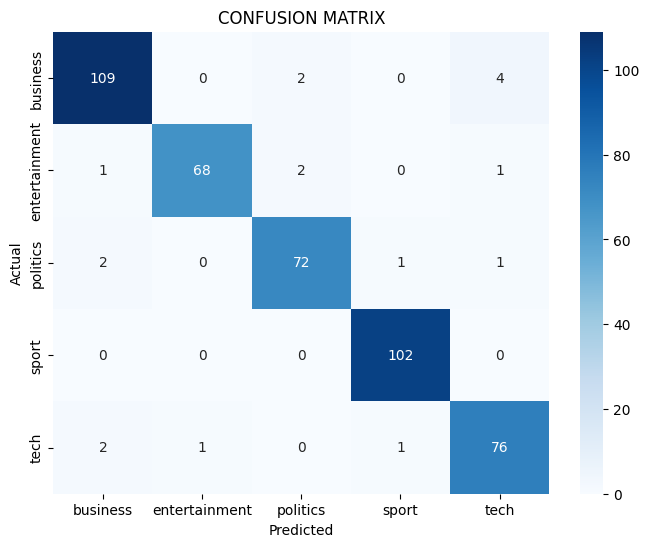

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=le.classes_,yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CONFUSION MATRIX")
plt.show()
